# WORLD HAPPINESS REPORT

In [3]:
# This program predict the happiness score

In [4]:
# import libraries and datasets

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [6]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [10]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [11]:
df.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201


In [12]:
df.shape

(158, 12)

In [13]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [14]:
df['Happiness Score'].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

<AxesSubplot:xlabel='Happiness Rank', ylabel='count'>

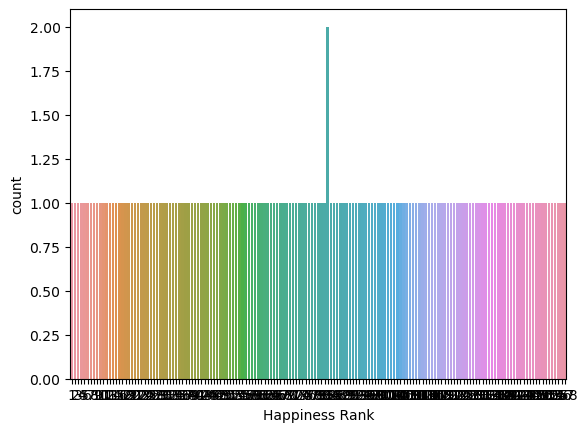

In [15]:
sns.countplot(df['Happiness Rank'])

<AxesSubplot:xlabel='Happiness Score', ylabel='count'>

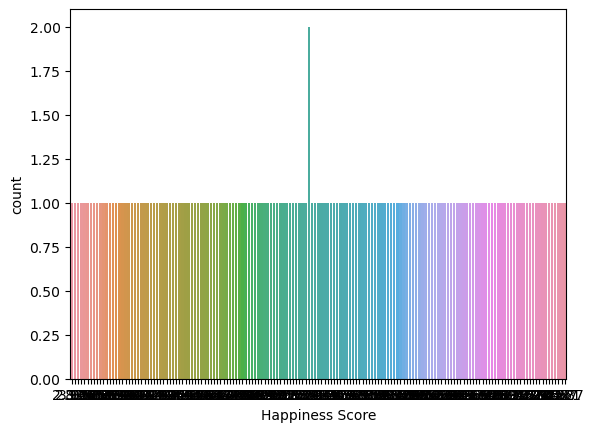

In [16]:
sns.countplot(df['Happiness Score'])

<AxesSubplot:xlabel='Standard Error', ylabel='count'>

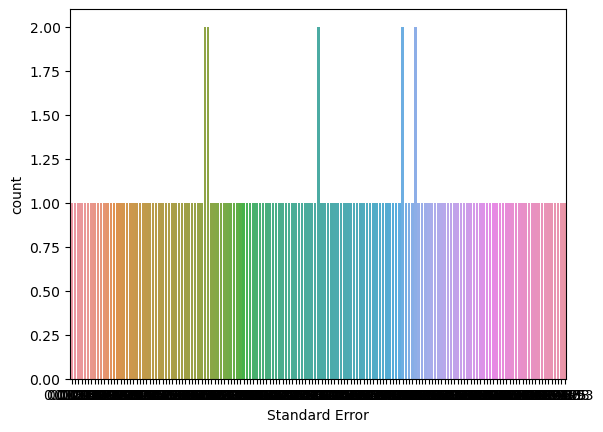

In [17]:
sns.countplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='count'>

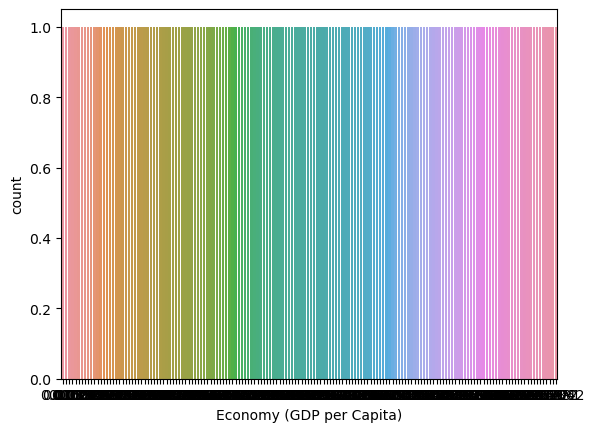

In [18]:
sns.countplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='count'>

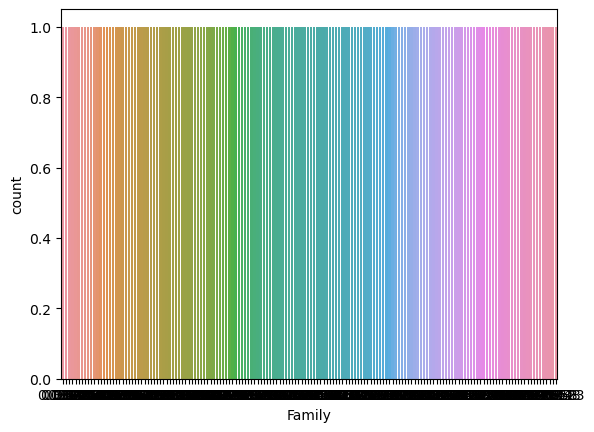

In [19]:
sns.countplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='count'>

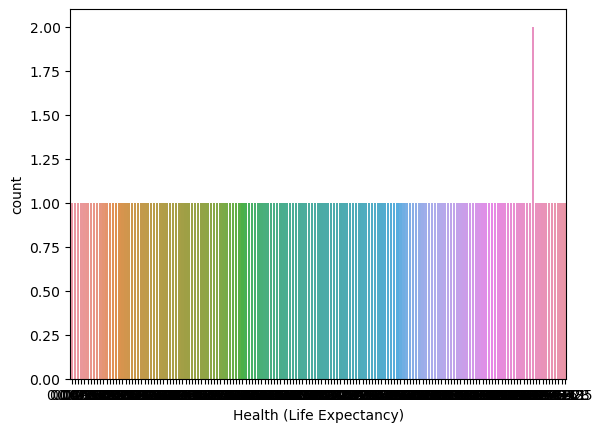

In [20]:
sns.countplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='count'>

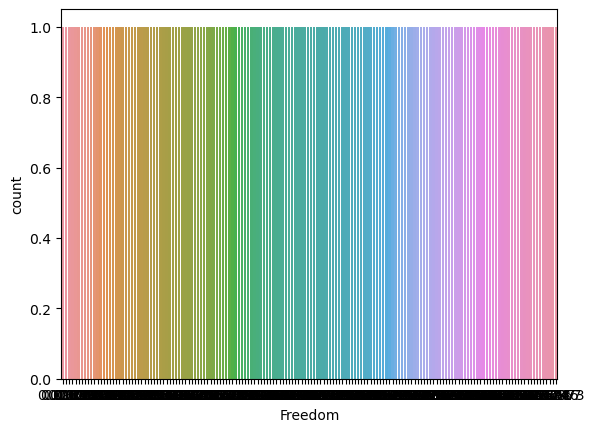

In [21]:
sns.countplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='count'>

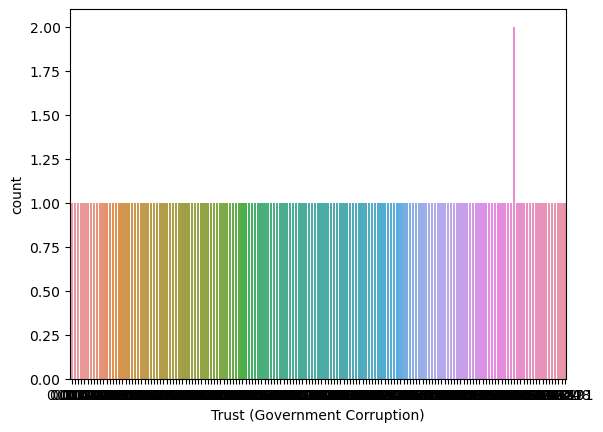

In [22]:
sns.countplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='count'>

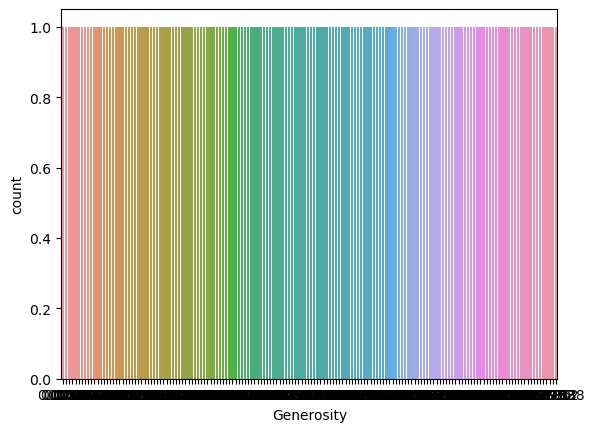

In [23]:
sns.countplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='count'>

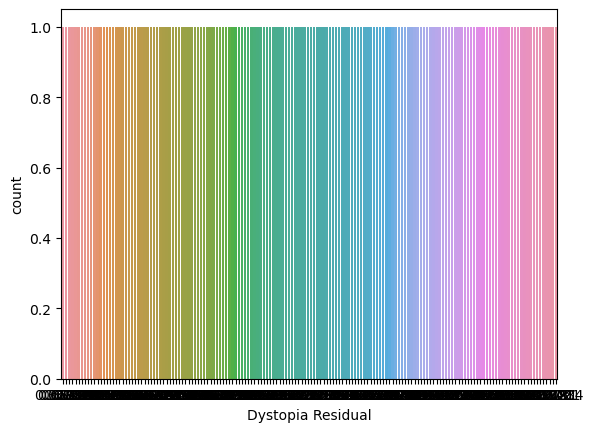

In [24]:
sns.countplot(df['Dystopia Residual'])

In [25]:
for val in df:
    print(df[val].value_counts())
    print()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

0.03780    2
0.03751    2
0.04394    2
0.050

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

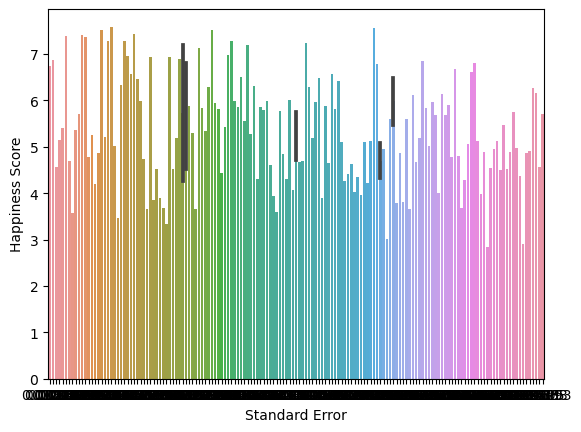

In [26]:
sns.barplot(x='Standard Error',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

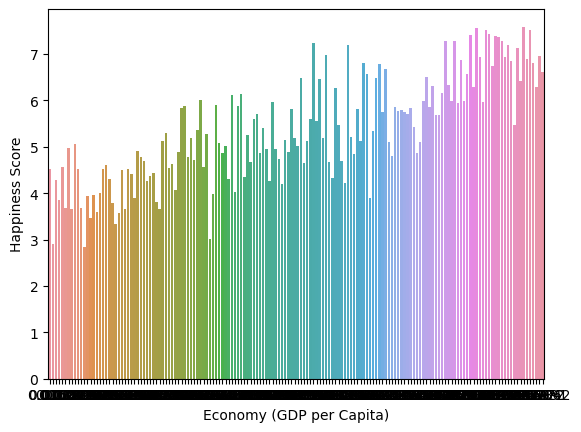

In [27]:
sns.barplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

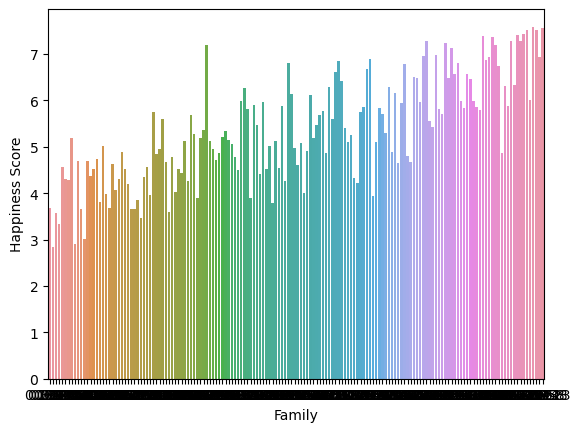

In [28]:
sns.barplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

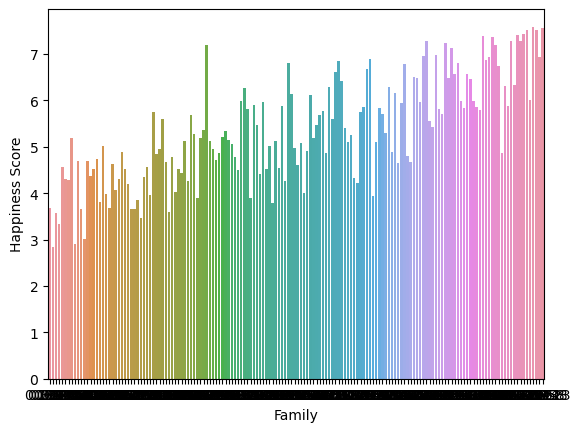

In [29]:
sns.barplot(x='Family',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

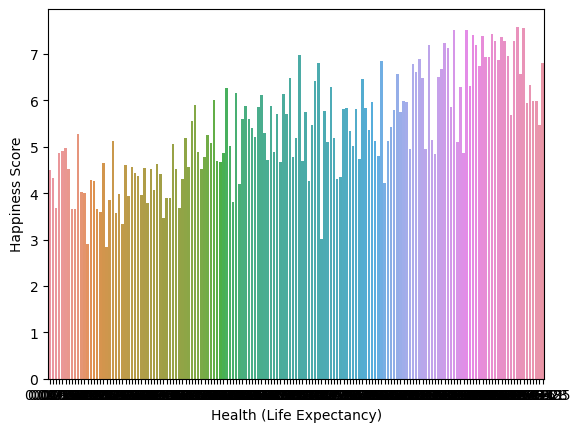

In [30]:
sns.barplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

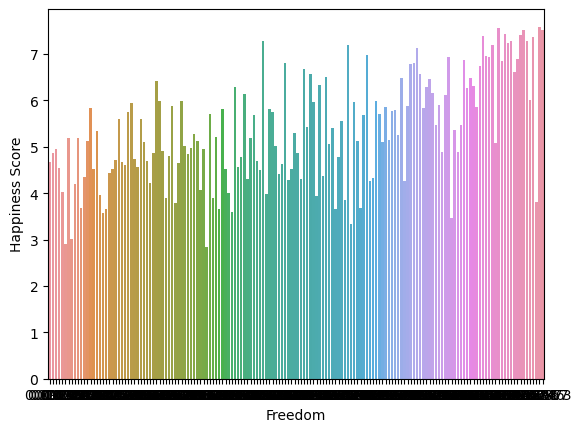

In [31]:
sns.barplot(x='Freedom',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

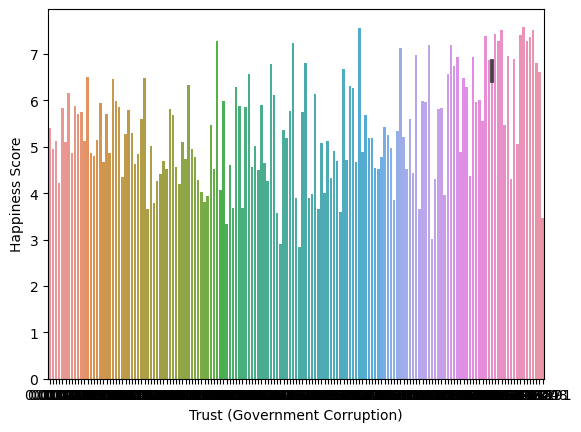

In [32]:
sns.barplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

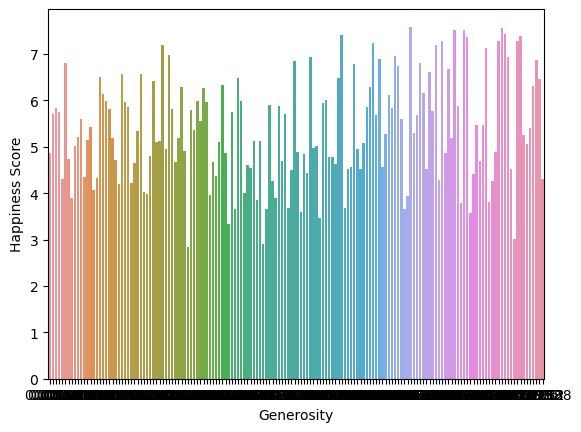

In [33]:
sns.barplot(x='Generosity',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

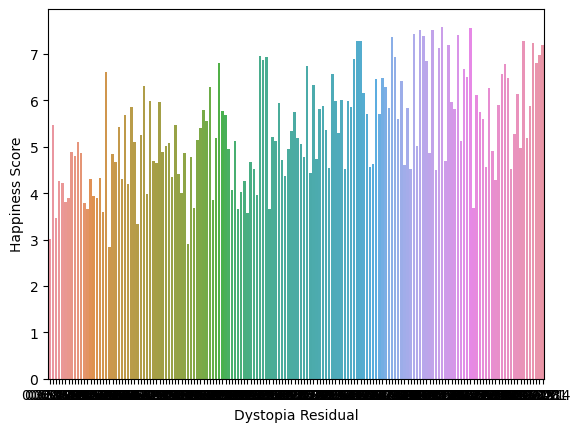

In [34]:
sns.barplot(x='Dystopia Residual',y='Happiness Score',data=df)

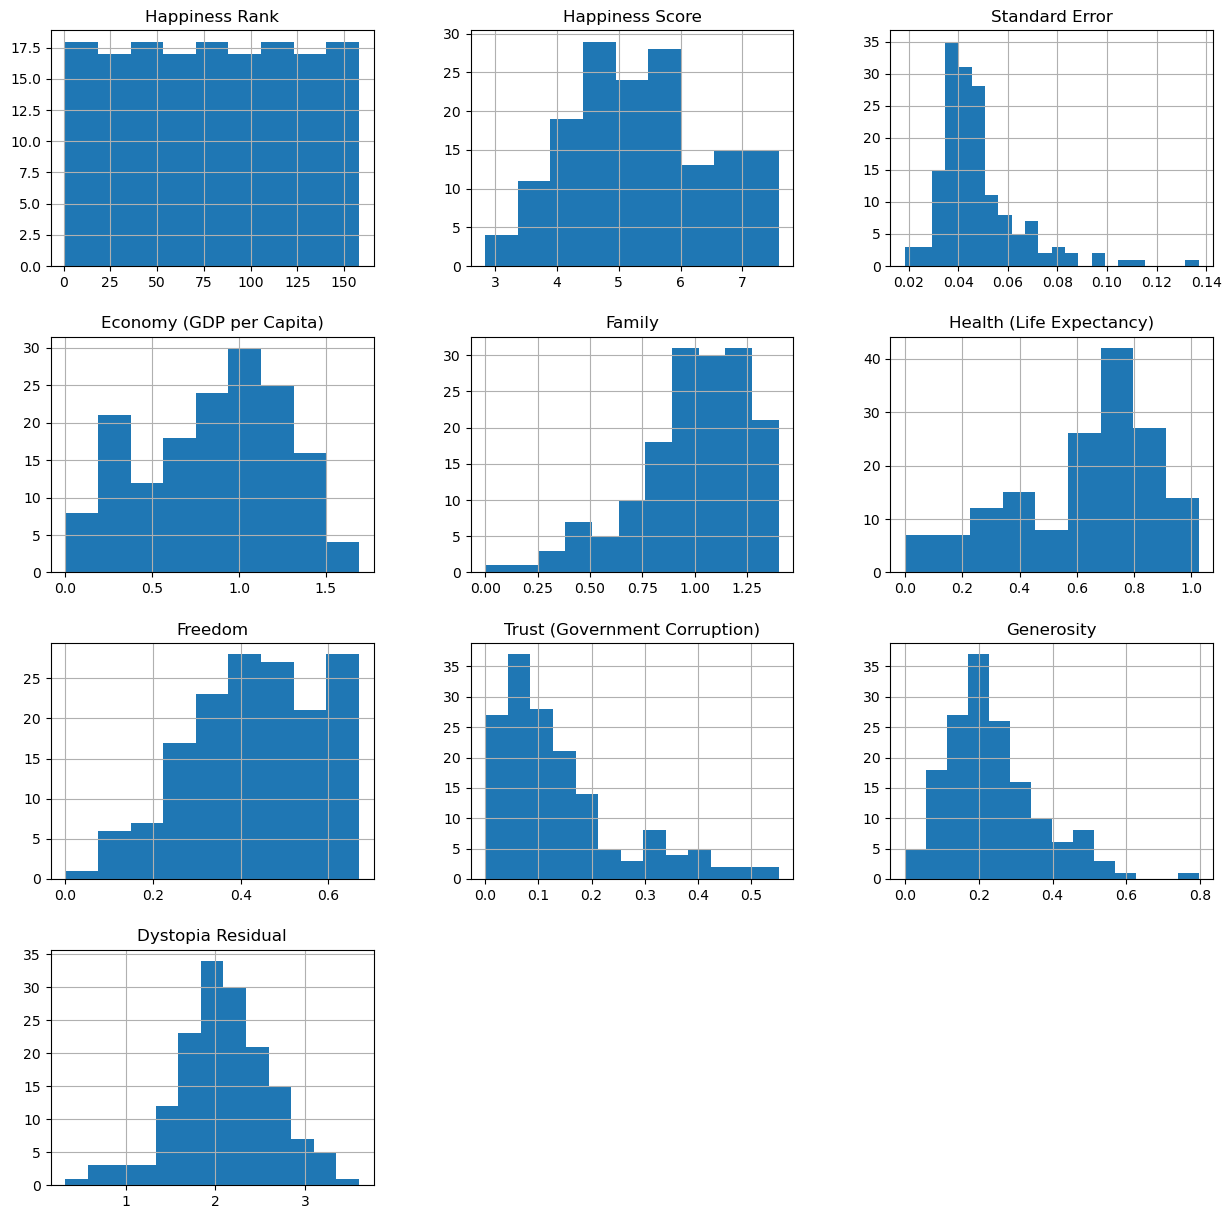

In [35]:
df.hist(bins='auto', figsize=(15,15));

In [34]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

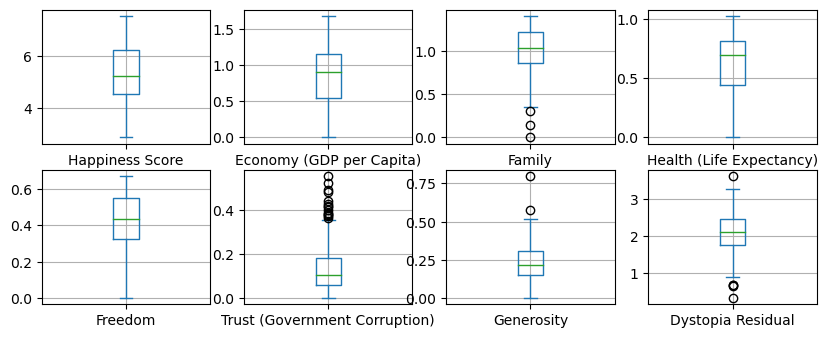

In [37]:
df[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True);

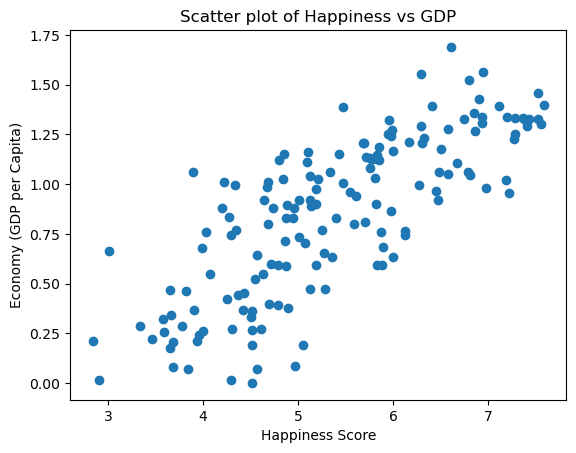

In [39]:
happiness_score = df['Happiness Score']
gdp= df['Economy (GDP per Capita)']

plt.scatter(happiness_score, gdp)
plt.title('Scatter plot of Happiness vs GDP')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

In [35]:
df.groupby('Country')[['Happiness Score']].mean()

,Happiness Score
Country,
Afghanistan,3.575
Albania,4.959
Algeria,5.605
Angola,4.033
Argentina,6.574
...,...
Venezuela,6.810
Vietnam,5.360
Yemen,4.077


In [40]:
rich_countries = df[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False)
rich_countries.head()

,Economy (GDP per Capita)
Country,
Qatar,1.69042
Luxembourg,1.56391
Kuwait,1.55422
Singapore,1.52186
Norway,1.45900


In [41]:
sad_countries = df[['Country', 'Happiness Rank']].groupby('Country').mean().sort_values(by = 'Happiness Rank', ascending = True)
sad_countries.tail()

,Happiness Rank
Country,
Rwanda,154.0
Benin,155.0
Syria,156.0
Burundi,157.0
Togo,158.0


In [42]:
healthy_countries = df[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)
healthy_countries.head()

,Country,Health (Life Expectancy)
23,Singapore,1.02525
71,Hong Kong,1.01328
45,Japan,0.99111
46,South Korea,0.96538
35,Spain,0.95562


In [47]:
low_life_expectancy = df[['Country', 'Health (Life Expectancy)']].sort_values(by='Health (Life Expectancy)', ascending=False)
low_life_expectancy.tail()

,Country,Health (Life Expectancy)
96,Lesotho,0.07612
100,Swaziland,0.07566
147,Central African Republic,0.06699
127,Botswana,0.04776
122,Sierra Leone,0.00000


In [48]:
#  Dropping irrelevant variables
new_happiness = df.drop(['Country', 'Happiness Rank', 'Region'], axis=1)
new_happiness.head()
#new_happiness.info()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [49]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

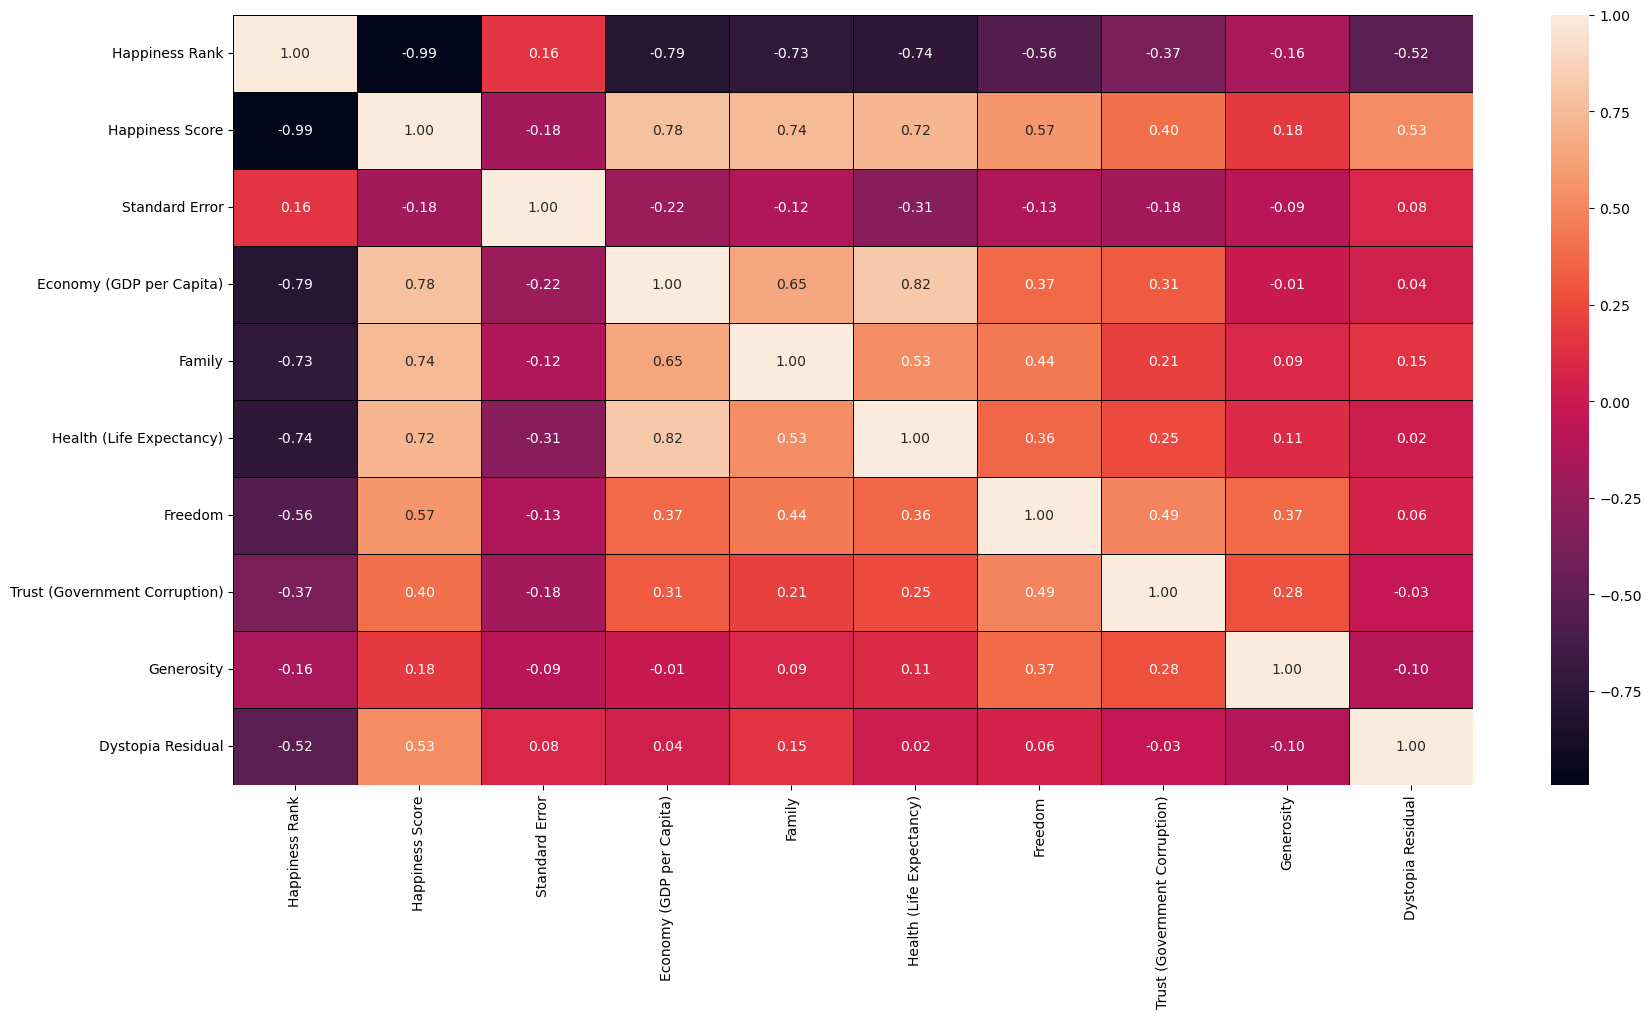

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f')

In [51]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


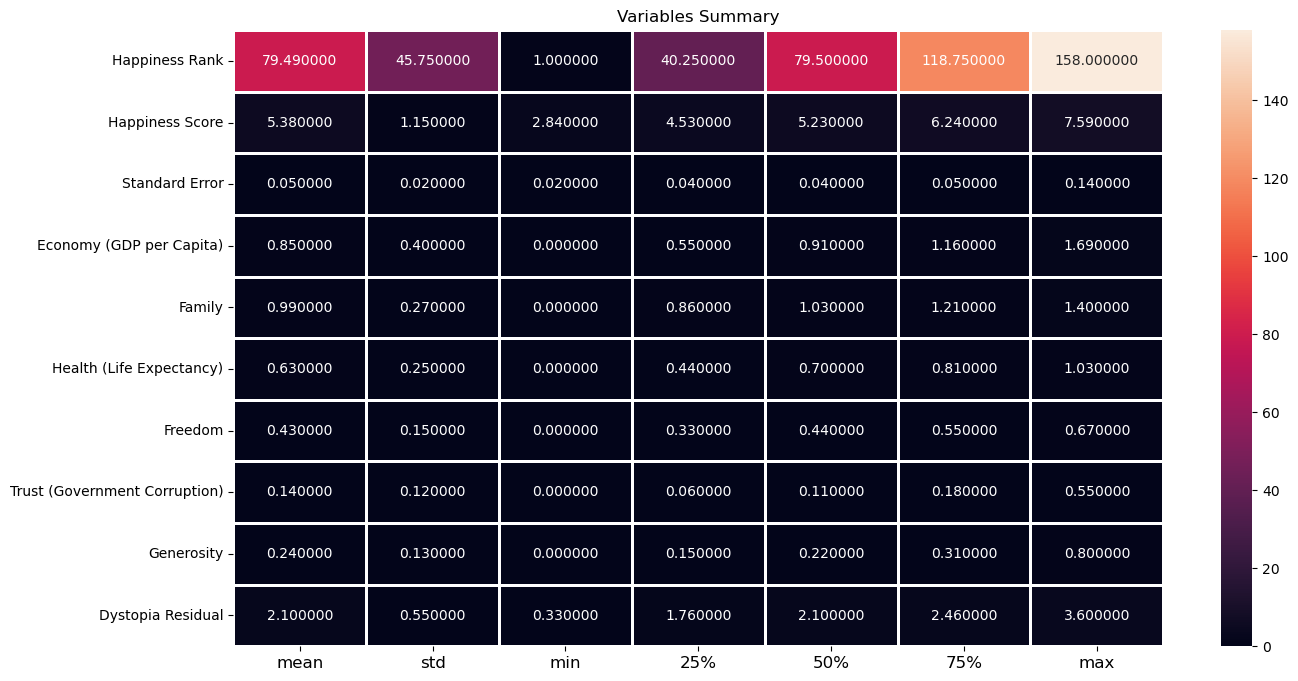

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=15)
plt.xticks(fontsize=12)
plt.title('Variables Summary')
plt.show()

In [54]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [55]:
X = new_happiness[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']]
y = new_happiness['Happiness Score']

# X = features, y = target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()

new_happiness = scale.fit_transform(new_happiness)

In [78]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()                   # instantiating the model

lm.fit(X_train, y_train)                      # fitting the model with the training dataset

LinearRegression()

In [80]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
y_pred = lm.predict(X_test)


print('Root Mean Squared Error:', np.sqrt(MSE(y_test, y_pred)))

Root Mean Squared Error: 0.6046634964252016
